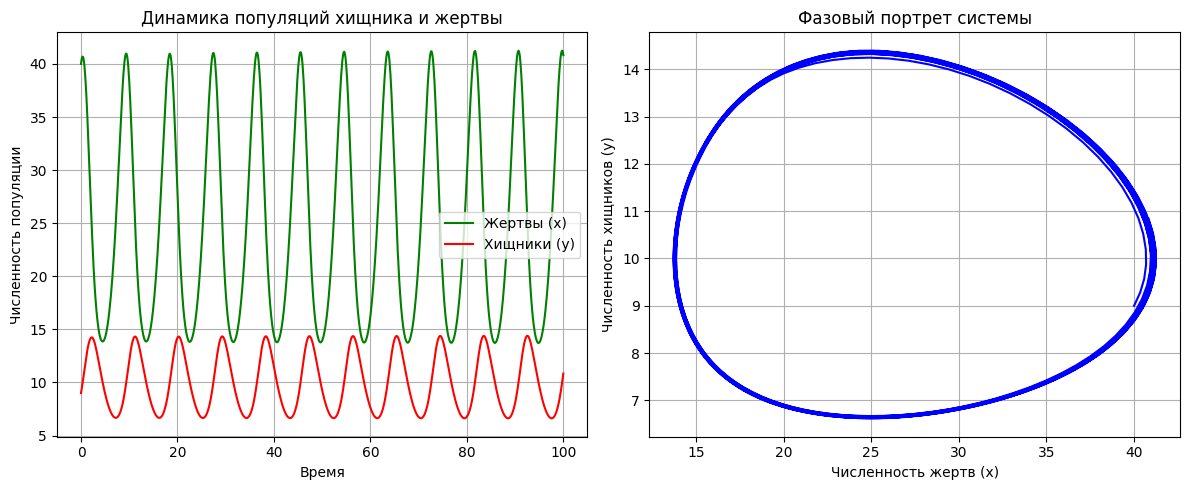

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Параметры модели
alpha = 1.0   # Скорость размножения жертв
beta = 0.1    # Скорость поедания жертв хищниками
gamma = 0.5   # Смертность хищников
delta = 0.02  # Скорость превращения съеденных жертв в новых хищников

# Уравнения системы (в форме, удобной для solve_ivp)
def predator_prey(t, z):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = -gamma * y + delta * x * y
    return [dxdt, dydt]

# Временной интервал и начальные условия
t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)
x0 = 40  # Начальная численность жертв
y0 = 9   # Начальная численность хищников
z0 = [x0, y0]

# Решение системы дифференциальных уравнений
solution = solve_ivp(predator_prey, t_span, z0, t_eval=t_eval)
x = solution.y[0]
y = solution.y[1]

# Построение графиков
plt.figure(figsize=(12, 5))

# График численности во времени
plt.subplot(1, 2, 1)
plt.plot(solution.t, x, label='Жертвы (x)', color='green')
plt.plot(solution.t, y, label='Хищники (y)', color='red')
plt.xlabel('Время')
plt.ylabel('Численность популяции')
plt.title('Динамика популяций хищника и жертвы')
plt.legend()
plt.grid(True)

# Фазовый портрет
plt.subplot(1, 2, 2)
plt.plot(x, y, color='blue')
plt.xlabel('Численность жертв (x)')
plt.ylabel('Численность хищников (y)')
plt.title('Фазовый портрет системы')
plt.grid(True)

plt.tight_layout()
plt.show()